In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
from matplotlib.pylab import rcParams
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from keras.models import load_model
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
import yfinance as fyf


# Title
st.title('Stock Trend Prediction')


fyf.pdr_override()


#Start and End
start = '2010-01-01'
end = '2023-03-15'

#User Input
user_input = st.text_input("Enter Stock Ticker", 'AAPL')

#Making df
df = pdr.get_data_yahoo(user_input,start,end)
df = df.reset_index()
st.subheader('Data from 2010 - 2023')
st.write(df.describe())

2023-03-30 21:50:59.179 
  command:

    streamlit run C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


[*********************100%***********************]  1 of 1 completed


In [2]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
3316 2023-03-08  152.809998  153.470001  151.830002  152.869995  152.869995   
3317 2023-03-09  153.559998  154.539993  150.229996  150.589996  150.589996   
3318 2023-03-10  150.210007  150.940002  147.610001  148.500000  148.500000   
3319 2023-03-13  147.809998  153.139999  147.699997  150.470001  150.470001   
3320 2023-03-14  151.279999  153.399994  150.100006  152.589996  152.589996   

        Volume  
3316  47204800  
3317  53833600  
3318  68524400  
3319  84457100  
3320  73695900

In [3]:
df.head()

Date      Open      High       Low     Close  Adj Close     Volume
0 2010-01-04  7.622500  7.660714  7.585000  7.643214   6.505280  493729600
1 2010-01-05  7.664286  7.699643  7.616071  7.656429   6.516527  601904800
2 2010-01-06  7.656429  7.686786  7.526786  7.534643   6.412874  552160000
3 2010-01-07  7.562500  7.571429  7.466071  7.520714   6.401018  477131200
4 2010-01-08  7.510714  7.571429  7.466429  7.570714   6.443574  447610800

In [4]:
df= df.drop(['Date','Adj Close'], axis=1)
df.head()


Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800

In [5]:
df.head()


Open      High       Low     Close     Volume
0  7.622500  7.660714  7.585000  7.643214  493729600
1  7.664286  7.699643  7.616071  7.656429  601904800
2  7.656429  7.686786  7.526786  7.534643  552160000
3  7.562500  7.571429  7.466071  7.520714  477131200
4  7.510714  7.571429  7.466429  7.570714  447610800

In [6]:
plt.plot(df.Close)


In [7]:
df


Open        High         Low       Close     Volume
0       7.622500    7.660714    7.585000    7.643214  493729600
1       7.664286    7.699643    7.616071    7.656429  601904800
2       7.656429    7.686786    7.526786    7.534643  552160000
3       7.562500    7.571429    7.466071    7.520714  477131200
4       7.510714    7.571429    7.466429    7.570714  447610800
...          ...         ...         ...         ...        ...
3316  152.809998  153.470001  151.830002  152.869995   47204800
3317  153.559998  154.539993  150.229996  150.589996   53833600
3318  150.210007  150.940002  147.610001  148.500000   68524400
3319  147.809998  153.139999  147.699997  150.470001   84457100
3320  151.279999  153.399994  150.100006  152.589996   73695900

[3321 rows x 5 columns]

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100



0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3316    143.497200
3317    143.573200
3318    143.674399
3319    143.754999
3320    143.843399
Name: Close, Length: 3321, dtype: float64

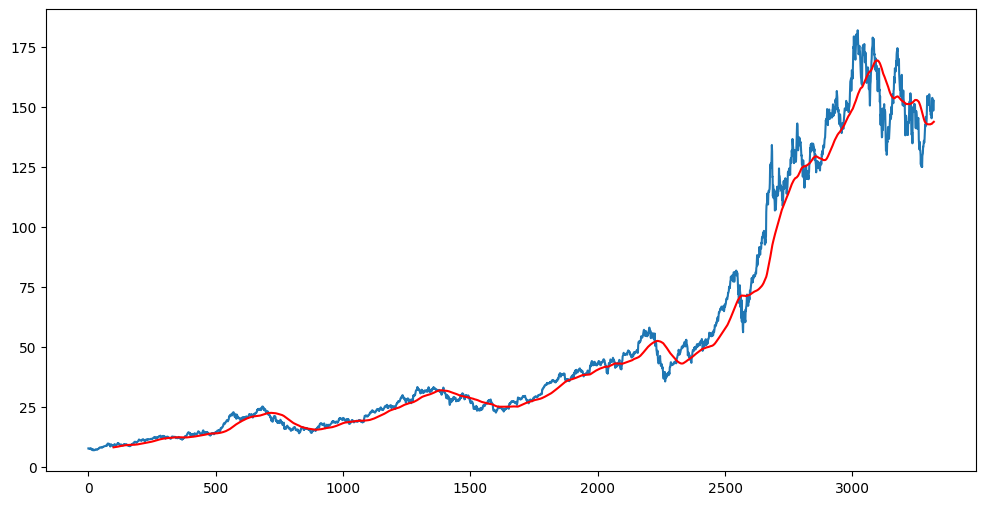

In [9]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')


In [10]:
ma200 = df.Close.rolling(200).mean()
ma200



0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3316    147.36185
3317    147.42685
3318    147.45380
3319    147.50435
3320    147.56470
Name: Close, Length: 3321, dtype: float64

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')


In [12]:
df.shape


(3321, 5)

In [13]:
# splliting data into training and testing
data_training =pd.DataFrame(df['Close'][0:int(len(df)* 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])
            
print(data_training.shape)   
print(data_testing.shape)   
                                        
                                        

(2324, 1)
(997, 1)


In [14]:
data_training.head()

Close
0  7.643214
1  7.656429
2  7.534643
3  7.520714
4  7.570714

In [15]:
data_testing.head()

Close
2324  47.487499
2325  47.810001
2326  48.505001
2327  48.837502
2328  48.922501

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.77872714],
       [0.78693695],
       [0.78815864]])

In [18]:
data_training_array.shape

(2324, 1)

In [19]:
x_train =[]
y_train =[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
        


In [20]:
x_train.shape

(2224, 100, 1)

In [21]:
# Ml Model

In [22]:
from keras.layers import Dense ,Dropout ,LSTM
from keras.models import Sequential


In [23]:
model= Sequential()
model.add(LSTM(units = 50 ,activation = 'relu',return_sequences =True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units = 60 ,activation = 'relu',return_sequences =True,))
model.add(Dropout(0.3))



model.add(LSTM(units = 80 ,activation = 'relu',return_sequences =True,))
model.add(Dropout(0.4))



model.add(LSTM(units = 120 ,activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer ='adam',loss= 'mean_squared_error')
model.fit(x_train,y_train,epochs =50)

Epoch 1/50
70/70 [==============================] - 22s 215ms/step - loss: 0.0323
Epoch 2/50
70/70 [==============================] - 15s 209ms/step - loss: 0.0065
Epoch 3/50
70/70 [==============================] - 15s 214ms/step - loss: 0.0054
Epoch 4/50
70/70 [==============================] - 15s 213ms/step - loss: 0.0049
Epoch 5/50
70/70 [==============================] - 15s 214ms/step - loss: 0.0051
Epoch 6/50
70/70 [==============================] - 15s 217ms/step - loss: 0.0044
Epoch 7/50
70/70 [==============================] - 15s 209ms/step - loss: 0.0046
Epoch 8/50
70/70 [==============================] - 14s 205ms/step - loss: 0.0042
Epoch 9/50
70/70 [==============================] - 15s 215ms/step - loss: 0.0042
Epoch 10/50
70/70 [==============================] - 16s 228ms/step - loss: 0.0035
Epoch 11/50
70/70 [==============================] - 16s 229ms/step - loss: 0.0039
Epoch 12/50
70/70 [==============================] - 15s 218ms/step - loss: 0.0036
Epoch 13/50
7

In [26]:
model.save('keras_model.h5')

In [27]:
data_testing.head()


Close
2324  47.487499
2325  47.810001
2326  48.505001
2327  48.837502
2328  48.922501

In [28]:
data_training.tail(100)

Close
2224  55.555000
2225  51.869999
2226  50.397499
2227  50.942501
2228  52.487499
...         ...
2319  47.762501
2320  47.185001
2321  46.697498
2322  47.117500
2323  47.180000

[100 rows x 1 columns]

In [29]:
past_100_days = data_training.tail(100)



In [30]:
final_df = past_100_days.append(data_testing, ignore_index = True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_20260\3062469626.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index = True)


In [31]:
final_df.head()


Close
0  55.555000
1  51.869999
2  50.397499
3  50.942501
4  52.487499

In [32]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13660494],
       [0.1114449 ],
       [0.10139113],
       ...,
       [0.77120426],
       [0.78465481],
       [0.79912947]])

In [33]:
input_data.shape

(1097, 1)

In [34]:
x_test = []
y_test =[]

for i in range (100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i ,0])   

In [35]:
x_test ,y_test = np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(997, 100, 1)
(997,)


In [36]:
#making predictions

y_predicted = model.predict(x_test)

32/32 [==============================] - 5s 71ms/step


In [37]:
y_predicted.shape

(997, 1)

In [38]:
y_test

array([0.08152257, 0.08372451, 0.08846975, 0.09073996, 0.09132031,
       0.09355637, 0.09884784, 0.09782367, 0.09973542, 0.09688486,
       0.09674831, 0.0973628 , 0.09739694, 0.10401981, 0.10526585,
       0.10640949, 0.1114449 , 0.1108987 , 0.10768968, 0.1060169 ,
       0.10654605, 0.09982077, 0.11663396, 0.11429546, 0.11873346,
       0.11315182, 0.10355893, 0.1036272 , 0.09990612, 0.0938636 ,
       0.0743023 , 0.07932065, 0.08317828, 0.08174448, 0.079901  ,
       0.06981308, 0.0758044 , 0.06928394, 0.06395836, 0.06278058,
       0.06151744, 0.06006658, 0.06163694, 0.05612359, 0.05310233,
       0.06392421, 0.06887427, 0.07344884, 0.08186395, 0.08601178,
       0.08981821, 0.08875993, 0.08869163, 0.08628489, 0.08824784,
       0.0960314 , 0.09504138, 0.09775541, 0.09659469, 0.09625331,
       0.09111549, 0.09833576, 0.09823335, 0.09512674, 0.10132287,
       0.10333702, 0.10620467, 0.10589741, 0.09871128, 0.10079373,
       0.10419049, 0.10166425, 0.10430998, 0.10757021, 0.10635

In [39]:
y_predicted


array([[0.12392259],
       [0.12499543],
       [0.12602213],
       [0.12700787],
       [0.1279581 ],
       [0.12888044],
       [0.12979037],
       [0.13071084],
       [0.13165723],
       [0.13264076],
       [0.13365877],
       [0.13470064],
       [0.13575324],
       [0.13680135],
       [0.13784601],
       [0.1388925 ],
       [0.1399465 ],
       [0.14102381],
       [0.14213455],
       [0.14327282],
       [0.14442071],
       [0.14555737],
       [0.14664085],
       [0.14767884],
       [0.14868097],
       [0.1496697 ],
       [0.15064739],
       [0.15157974],
       [0.1524286 ],
       [0.15315205],
       [0.15370528],
       [0.15402138],
       [0.1540561 ],
       [0.15379557],
       [0.15324563],
       [0.15242638],
       [0.15135308],
       [0.15005934],
       [0.14854664],
       [0.14684288],
       [0.14498927],
       [0.14302783],
       [0.14099947],
       [0.13894796],
       [0.13690352],
       [0.13488661],
       [0.1329445 ],
       [0.131

In [40]:
scaler.scale_

array([0.00682769])

In [41]:
scale_factor= 1/0.02018978
y_predicted = y_predicted =scale_factor
y_test = y_test = scale_factor

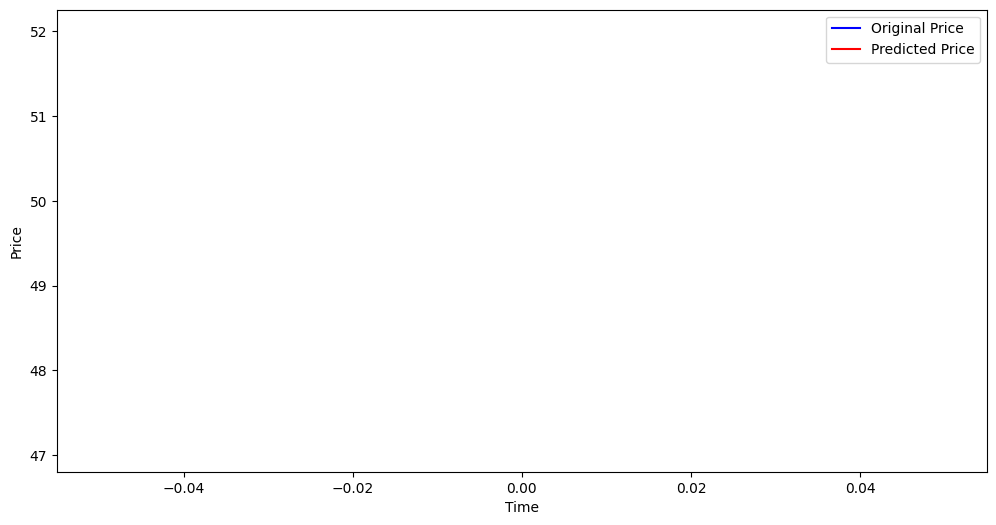

In [42]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label = 'Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

